Fasion Product Images Classification

In [1]:
# connecting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import files for dataset
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/fasionDataSet.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

1 Data exploration

In [3]:
import pandas as pd
# create data frame from csv file with image "id" and "articleType" as columns
df = pd.read_csv("../tmp/fasionDataSet.csv", sep=";")
df.head()

,id,articleType
0,1163,Tshirts
1,1164,Tshirts
2,1165,Tshirts
3,1525,Backpacks
4,1526,Backpacks


In [4]:
min=df['id'].min()
max=df['id'].max()
print("Minimum value of image name is:  "+str(min))
print("Maximum value of image name is:"+str(max))
print("Number of images: " +str(df.shape[0]))

Minimum value of image name is:  1163
Maximum value of image name is:60000
Number of images: 44444


In [5]:
# checking classes
categories = df['articleType'].unique()
categories.sort()
print("Number of classes: "+str(len(categories)))
print(categories)

Number of classes: 143
['Accessory Gift Set' 'Baby Dolls' 'Backpacks' 'Bangle' 'Basketballs'
 'Bath Robe' 'Beauty Accessory' 'Belts' 'Blazers' 'Body Lotion'
 'Body Wash and Scrub' 'Booties' 'Boxers' 'Bra' 'Bracelet' 'Briefs'
 'Camisoles' 'Capris' 'Caps' 'Casual Shoes' 'Churidar' 'Clothing Set'
 'Clutches' 'Compact' 'Concealer' 'Cufflinks' 'Cushion Covers' 'Deodorant'
 'Dresses' 'Duffel Bag' 'Dupatta' 'Earrings' 'Eye Cream' 'Eyeshadow'
 'Face Moisturisers' 'Face Scrub and Exfoliator' 'Face Serum and Gel'
 'Face Wash and Cleanser' 'Flats' 'Flip Flops' 'Footballs' 'Formal Shoes'
 'Foundation and Primer' 'Fragrance Gift Set' 'Free Gifts' 'Gloves'
 'Hair Accessory' 'Hair Colour' 'Handbags' 'Hat' 'Headband' 'Heels'
 'Highlighter and Blush' 'Innerwear Vests' 'Ipad' 'Jackets' 'Jeans'
 'Jeggings' 'Jewellery Set' 'Jumpsuit' 'Kajal and Eyeliner' 'Key chain'
 'Kurta Sets' 'Kurtas' 'Kurtis' 'Laptop Bag' 'Leggings' 'Lehenga Choli'
 'Lip Care' 'Lip Gloss' 'Lip Liner' 'Lip Plumper' 'Lipstick'
 'Lounge

<Axes: >

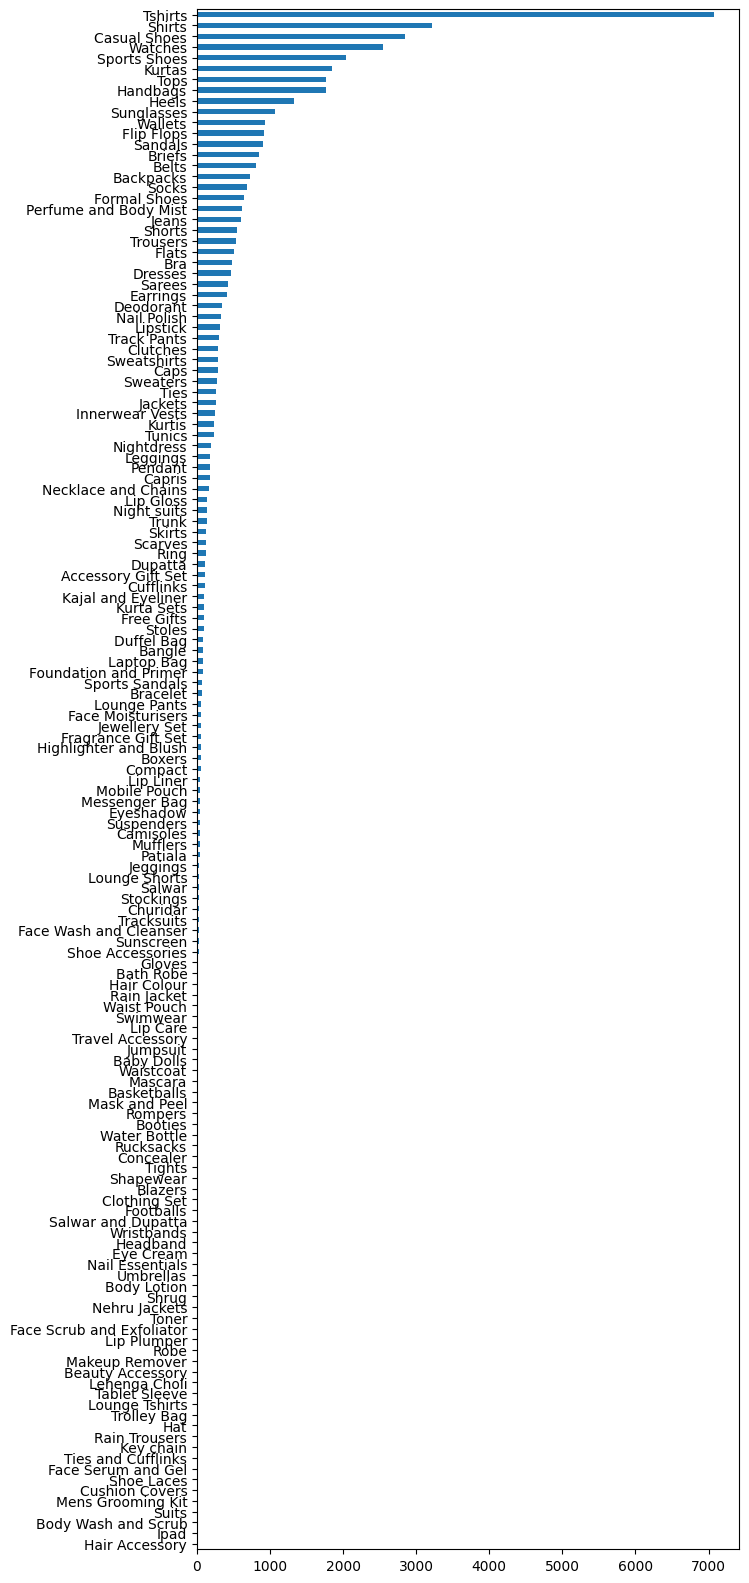

In [6]:
# checking class distrubution
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

In [7]:
categories_occurence_no = df.articleType.value_counts().sort_values()
categories_occurence_no

Hair Accessory            1
Ipad                      1
Body Wash and Scrub       1
Suits                     1
Mens Grooming Kit         1
                       ... 
Sports Shoes           2036
Watches                2542
Casual Shoes           2846
Shirts                 3217
Tshirts                7070
Name: articleType, Length: 143, dtype: int64

2 Data Preprocessing

2.1 DataSet is imbalanced and with to few samples for some classes - to improve model performance scarcely represented classes are removed

In [8]:
# drop second half of most occuring categories
categories_occurence_no = df.articleType.value_counts().sort_values()
values = df['articleType'].value_counts(dropna=False).keys().tolist()
counts = df['articleType'].value_counts(dropna=False).tolist()
category_counts_dict = dict(zip(values, counts))
most_occuring_categories = list(category_counts_dict.keys())[:len(category_counts_dict)//2]
least_occuring_categories = list(category_counts_dict.keys())[len(category_counts_dict)//2:]
most_occuring_categories
df_half = df[df['articleType'].isin(most_occuring_categories)]

In [9]:
print(df_half.articleType.value_counts())

Tshirts                  7070
Shirts                   3217
Casual Shoes             2846
Watches                  2542
Sports Shoes             2036
                         ... 
Jewellery Set              58
Fragrance Gift Set         57
Highlighter and Blush      53
Boxers                     52
Compact                    49
Name: articleType, Length: 71, dtype: int64


In [10]:
print(len(most_occuring_categories))
print(len(df)-len(df_half))

71
1043


Removing half of the classes results in loss of 1043 images

<Axes: >

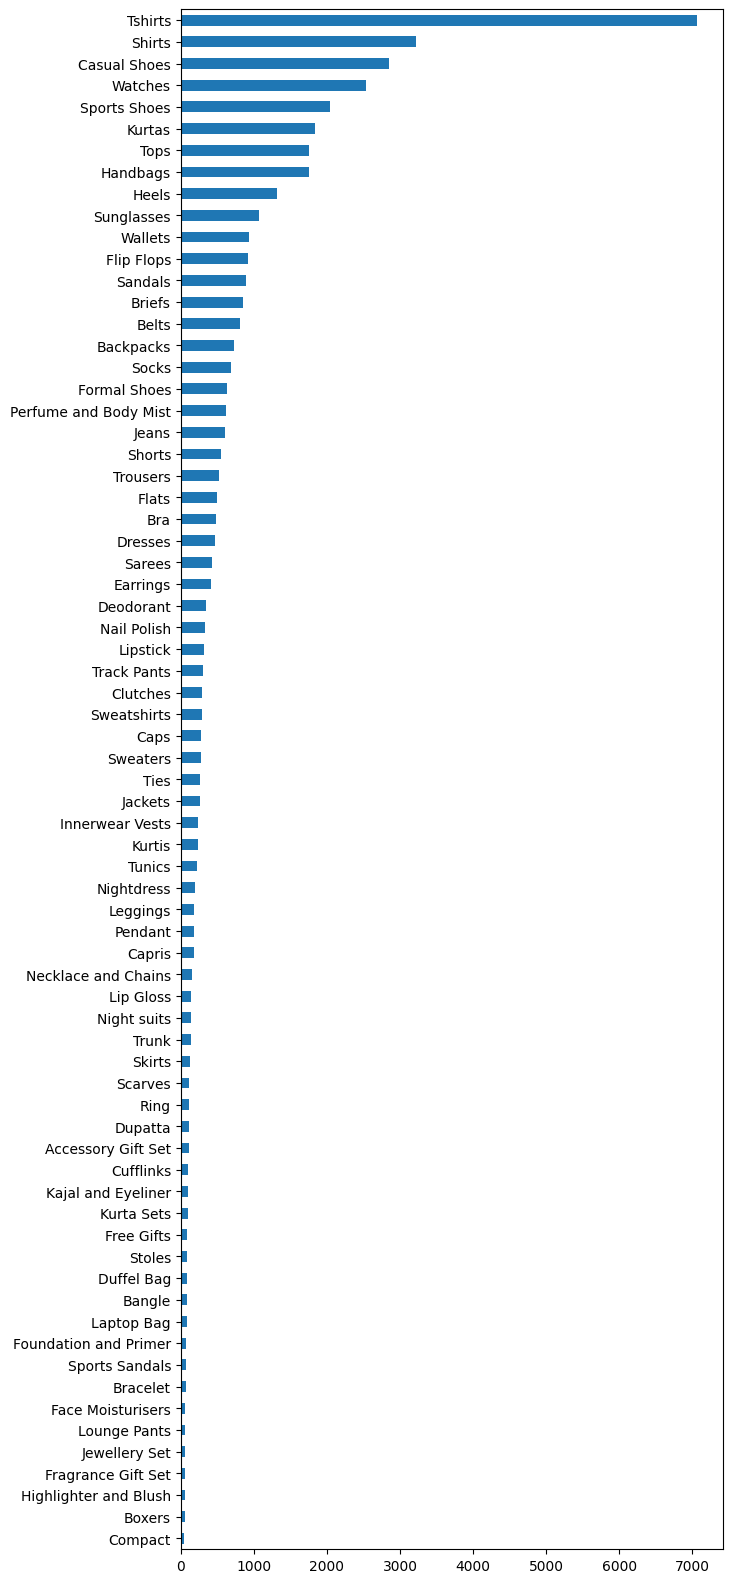

In [11]:
plt.figure(figsize=(7,20))
df_half.articleType.value_counts().sort_values().plot(kind='barh')

2.2 Set "id" column as data frame index

In [12]:
# set "id" column as data frame index
df=df.set_index('id')
df_half=df_half.set_index('id')

In [13]:
# replacing string categories with numerical values for feeding to ML model
df_numerical = df.replace(to_replace=categories, value=list(range(0,143)))
df_half_numerical = df_half.replace(to_replace=most_occuring_categories, value=list(range(0,71)))

In [14]:
df.head()

,articleType
id,
1163,Tshirts
1164,Tshirts
1165,Tshirts
1525,Backpacks
1526,Backpacks


In [15]:
df_numerical.head()

,articleType
id,
1163,134
1164,134
1165,134
1525,2
1526,2


In [16]:
df_half.head()

,articleType
id,
1163,Tshirts
1164,Tshirts
1165,Tshirts
1525,Backpacks
1526,Backpacks


In [17]:
df_half_numerical.head()

,articleType
id,
1163,0
1164,0
1165,0
1525,15
1526,15


2.2 Preprocesing images list to match dataframe with image Id's and labels

In [18]:
# use this line to reset directory to reload files
os.chdir('../../content/')

In [19]:
BASE_DIR = '../tmp/images/'
files_in_train = os.listdir(BASE_DIR)
os.chdir('../tmp/images/')

In [20]:
# renaming files to match ids in data frame
files_in_train=[int(ele[:-4]) for ele in files_in_train ]
files_in_train.sort()
len(files_in_train)

44441

2.3 Removing not classified images from images list

In [21]:
images_list = df_half.index.tolist()
files_in_train = [img for img in files_in_train if img in images_list]

In [22]:
print(len(files_in_train))
print(len(images_list))

43397
43401


2.4 Convering images to np arrays, normalization to 0-1 and validating images shape

In [23]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils  import array_to_img
import numpy as np

img_arrays = []
labels_arrays = []
# Define a function to process images and append to arrays
def process_image(img_path):
    loaded_img = load_img(str(img_path) + ".jpg")
    img_array = img_to_array(loaded_img) / 255.0

    if img_array.shape == (80, 60, 3):
        index = img_path
        if df_half.loc[index]['articleType'] in most_occuring_categories:
            img_arrays.append(img_array)
            labels_arrays.append(int(df_half_numerical.loc[index]['articleType']))

# Iterate over the image paths and process them in batches/ doesnt help with RAM consumption
batch_size = 1000
num_images = len(files_in_train)
for i in range(0, num_images, batch_size):
    batch_paths = files_in_train[i:i + batch_size]
    for img_path in batch_paths:
        process_image(img_path)

In [24]:
# convert arrays to np arrays
img_np = np.array(img_arrays)
labels_np = np.array(labels_arrays)

In [25]:
# Iterate over the images in the array
for i in range(img_np.shape[0]):
    # Get the current image
    image = img_np[i]

    # Find pixels where all RGB values are equal to 1
    white_pixels = np.all(image > [0.98, 0.98, 0.98], axis=2)

    # Create a mask for white pixels
    mask = np.expand_dims(white_pixels, axis=2)
    # mask = np.tile(mask, (1, 1, 3))

    # Change white pixels to black
    image = np.where(mask, [0, 0, 0], image)
    img_np[i] = image

In [26]:
print(len(img_np))
print(len(labels_np))

43375
43375


2.5 Image from np array visualisation

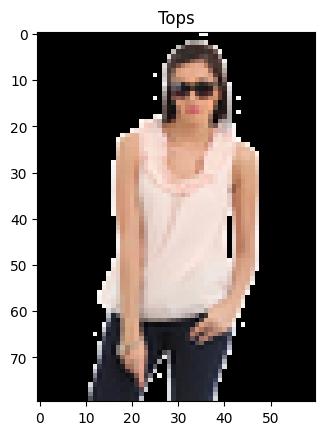

In [27]:
plt.imshow(img_np[41332])
plt.title(most_occuring_categories[labels_np[41332]])
plt.show()

3 Data preparation for ML model

In [28]:
print(img_np.shape)
print(labels_np.shape)

(43375, 80, 60, 3)
(43375,)


3.1 Define values for train, validation and test data split

In [29]:
size=len(img_np)
train_end=int(size*0.5)
val_end= int(size*0.75)

3.2 Shuffle images and labels arrays in unison - this improved base model accuracy from 50% to 70%

In [30]:
shuffled = np.arange(len(img_np))
np.random.shuffle(shuffled)
img_np_shuffled = img_np[shuffled]
labels_np_shuffled = labels_np[shuffled]

(garbage collector to free RAM space on colab)

In [31]:
import gc

del img_np
del labels_np
del df
del files_in_train
del img_arrays
del labels_arrays
del shuffled
gc.collect()

3581

3.3 One hot encoding

In [32]:
from keras.utils import to_categorical
# Convert labels to one-hot encoding
labels_np_shuffled = to_categorical(labels_np_shuffled, num_classes=len(most_occuring_categories))

3.4 Data split for train, validation and test and reshaping to match input requirements of Shallow Neural Network - flat tensor

In [33]:
train_data, train_labels = img_np_shuffled[:train_end], labels_np_shuffled[:train_end]
val_data, val_labels = img_np_shuffled[train_end:val_end], labels_np_shuffled[train_end:val_end]
test_data, test_labels = img_np_shuffled[val_end:size], labels_np_shuffled[val_end:size]
print(train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape)

# reshaping to match input requirements of Shallow Neural Network
train_data = train_data.reshape(train_data.shape[0], -1)
val_data = val_data.reshape(val_data.shape[0], -1)
test_data = test_data.reshape(test_data.shape[0], -1)
print(train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape)

(21687, 80, 60, 3) (21687, 71) (10844, 80, 60, 3) (10844, 71) (10844, 80, 60, 3) (10844, 71)
(21687, 14400) (21687, 71) (10844, 14400) (10844, 71) (10844, 14400) (10844, 71)


4 ML Models

4.1 Base Shallow Neural Network

In [34]:
# Define the model
base_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=train_data[1].shape),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(len(most_occuring_categories), activation=tf.nn.softmax)
])

In [35]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [36]:
# Print the model summary
base_model.summary()

# Setup training parameters
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.CategoricalAccuracy()])

# Train the model
print(f'\nMODEL TRAINING:')
base_histrory = base_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
base_model_test_loss = base_model.evaluate(test_data, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1843328   
                                                                 
 dense_1 (Dense)             (None, 71)                9159      
                                                                 
Total params: 1,852,487
Trainable params: 1,852,487
Non-trainable params: 0
_________________________________________________________________

MODEL TRAINING:
Epoch 1/10
678/678 [==============================] - 11s 8ms/step - loss: 1.5951 - precision: 0.7597 - categorical_accuracy: 0.5858 - val_loss: 1.3265 - val_precision: 0.7168 - val_categorical_accuracy: 0.6048
Epoch 2/10
678/678 [==============================] - 3s 5ms/step - loss: 1.0063 -

In [37]:
print(base_histrory.history.keys())

dict_keys(['loss', 'precision', 'categorical_accuracy', 'val_loss', 'val_precision', 'val_categorical_accuracy'])


In [38]:
base_model_loss = base_histrory.history["loss"]
base_model_val_loss = base_histrory.history["val_loss"]
# base_model_accuracy = base_histrory.history["accuracy"]
base_model_cat_acc = base_histrory.history["val_categorical_accuracy"]
base_model_precision = base_histrory.history["val_precision"]

In [39]:
del img_np_shuffled
del labels_np_shuffled
del base_histrory
del base_model
del base_model_test_loss
gc.collect()

1684

4.2 Convolutional NN Model

In [40]:
train_data = train_data.reshape((21687, 80, 60, 3))
val_data = val_data.reshape((10844, 80, 60, 3))
test_data = test_data.reshape((10844, 80, 60, 3))

In [41]:
# Define the model
modelCNN = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(80, 60, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(most_occuring_categories), activation='softmax')
])

In [42]:
# Print the model summary
modelCNN.summary()

tf.keras.metrics.Precision(), tf.keras.metrics.CategoricalAccuracy()
# Use same settings
modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.CategoricalAccuracy()])

# Train the model
print(f'\nMODEL TRAINING:')
modelCNN_history = modelCNN.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
modelCNN_test_loss = modelCNN.evaluate(test_data, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 27, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7488)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [43]:
print(modelCNN_history.history.keys())

dict_keys(['loss', 'precision_2', 'categorical_accuracy', 'val_loss', 'val_precision_2', 'val_categorical_accuracy'])


In [44]:
modelCNN_loss = modelCNN_history.history["loss"]
modelCNN_val_loss = modelCNN_history.history["val_loss"]
# modelCNN_accuracy = modelCNN_history.history["accuracy"]
modelCNN_cat_acc = modelCNN_history.history["val_categorical_accuracy"]
modelCNN_precision = modelCNN_history.history["val_precision_2"]

In [45]:
del modelCNN
del modelCNN_history
del modelCNN_test_loss
gc.collect()

3681

4.3 Improved CNN Model

In [71]:
# Define the model
improvedCNN = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(80, 60, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.40),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.40),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.40),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.40),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'), #128 neurony skutkuje słabszą precyzją ale lepszą dokładnością: precision_6: 0.8802 - categorical_accuracy: 0.8401
  tf.keras.layers.Dense(len(most_occuring_categories), activation='softmax')
])

In [72]:
# Print the model summary
improvedCNN.summary()

# [tf.keras.metrics.Precision(),tf.keras.metrics.Accuracy(), tf.keras.metrics.CategoricalAccuracy()]
# Use same settings
improvedCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.CategoricalAccuracy()])

# Train the model
print(f'\nMODEL TRAINING:')
improvedCNN_history = improvedCNN.fit(train_data, train_labels, epochs=100, validation_data=(val_data, val_labels), batch_size=512, callbacks=[early_stopping])

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
improvedCNN_test_loss = improvedCNN.evaluate(test_data, test_labels)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 78, 58, 128)       3584      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 39, 29, 128)      0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 39, 29, 128)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 37, 27, 128)       147584    
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 18, 13, 128)      0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 18, 13, 128)     

In [73]:
print(improvedCNN_history.history.keys())

dict_keys(['loss', 'precision_9', 'categorical_accuracy', 'val_loss', 'val_precision_9', 'val_categorical_accuracy'])


In [74]:
improvedCNN_loss = improvedCNN_history.history["loss"]
improvedCNN_val_loss = improvedCNN_history.history["val_loss"]
# improvedCNN_accuracy = improvedCNN_history.history["accuracy"]
improvedCNN_cat_acc = improvedCNN_history.history["val_categorical_accuracy"]
improvedCNN_precision = improvedCNN_history.history["val_precision_9"]

In [75]:
del improvedCNN
del improvedCNN_history
del improvedCNN_test_loss
gc.collect()

16908

5 Models comparision

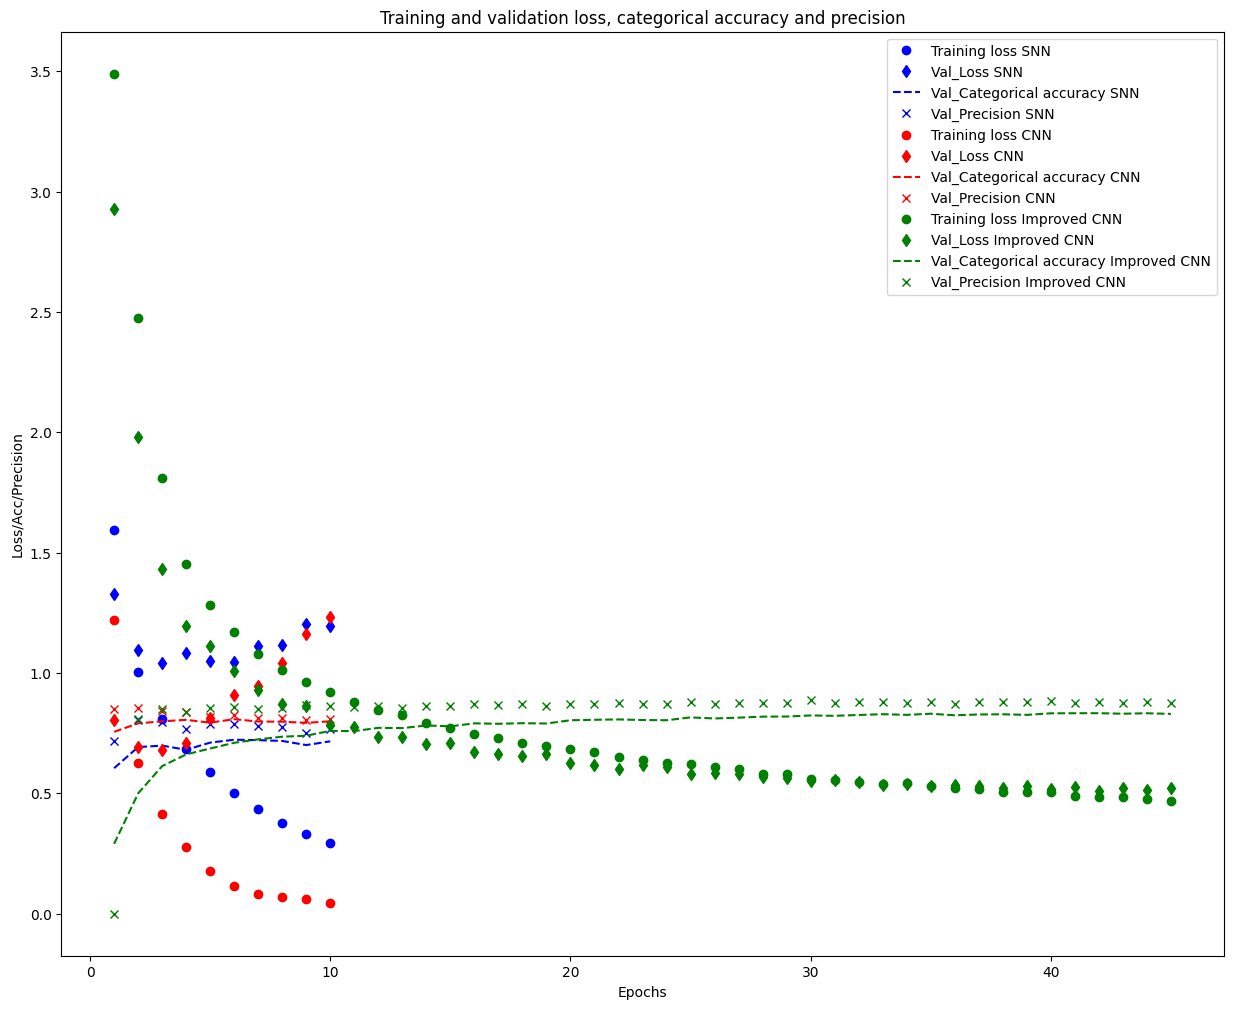

In [76]:
plt.figure(figsize=(15,12))

# adjusting epoch numbers
epochs_base = range(1, len(base_model_loss)+1)
epochs_CNN = range(1, len(modelCNN_loss)+1)
epochs = range(1, len(improvedCNN_loss)+1)

# ploting all metrics
plt.plot(epochs_base,base_model_loss, "bo", label="Training loss SNN")
plt.plot(epochs_base, base_model_val_loss, "bd", label="Val_Loss SNN")
# plt.plot(epochs_base, base_model_accuracy, "b-", label="Accuracy SNN")
plt.plot(epochs_base, base_model_cat_acc, "b--", label="Val_Categorical accuracy SNN")
plt.plot(epochs_base, base_model_precision, "bx", label="Val_Precision SNN")

plt.plot(epochs_CNN,modelCNN_loss, "ro", label="Training loss CNN")
plt.plot(epochs_CNN, modelCNN_val_loss, "rd", label="Val_Loss CNN")
# plt.plot(epochs_CNN, modelCNN_accuracy, "r-", label="Accuracy CNN")
plt.plot(epochs_CNN, modelCNN_cat_acc, "r--", label="Val_Categorical accuracy CNN")
plt.plot(epochs_CNN, modelCNN_precision, "rx", label="Val_Precision CNN")

plt.plot(epochs,improvedCNN_loss, "go", label="Training loss Improved CNN")
plt.plot(epochs, improvedCNN_val_loss, "gd", label="Val_Loss Improved CNN")
# plt.plot(epochs, improvedCNN_accuracy, "g-", label="Accuracy Improved CNN")
plt.plot(epochs, improvedCNN_cat_acc, "g--", label="Val_Categorical accuracy Improved CNN")
plt.plot(epochs, improvedCNN_precision, "gx", label="Val_Precision Improved CNN")

plt.title("Training and validation loss, categorical accuracy and precision")
plt.xlabel("Epochs")
plt.ylabel("Loss/Acc/Precision")
plt.legend()

plt.show()